In [44]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as ss
import thinkplot
import thinkstats2

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

<h1>Assignment 2: Life Expectancy and You!</h1>

<b>Instructions:</b>
<ul>
<li>Use the worksheet below to act as a guide to exploring and examining the data in the dataset.
<li>Try to make things easy to read. Look at the formatting stuff above. 
<li>As long as you do what is asked, you can do things in many different ways. You may need to do a little searching. 
</ul>

### Please Use Formatting to Make it Clear What I Should be Looking at! Please!!! I Beg You!!!

In [45]:
#Load data and do some cleanup before starting
#Please don't change this stuff. 
dfLE = pd.read_csv("data/led.csv")
dfLE.rename(columns={"Status":"isDeveloped", }, inplace=True)
dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
dfLE = dfLE.drop(columns={"Year", "Incomecompositionofresources", "thinness5-9years", "HIV/AIDS", "percentageexpenditure", "Totalexpenditure", "thinness1-19years"})
dfLE = dfLE.groupby("Country", as_index=False).mean()
dfLE.head()


C:\Users\VIP\AppData\Local\Temp\ipykernel_41112\2912163957.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfLE["isDeveloped"].replace(('Developed', 'Developing'), (1, 0), inplace=True)
C:\Users\VIP\AppData\Local\Temp\ipykernel_41112\2912163957.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
 

,Country,isDeveloped,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Diphtheria,GDP,Population,Schooling
0,Afghanistan,0.0,58.19375,269.0625,78.2500,0.014375,64.562500,2362.2500,15.51875,107.5625,48.3750,52.3125,4.136734e+09,9.972260e+06,8.21250
1,Albania,0.0,75.15625,45.0625,0.6875,4.848750,98.000000,53.3750,49.06875,0.9375,98.1250,98.0625,1.166938e+09,6.969116e+05,12.13750
2,Algeria,0.0,73.61875,108.1875,20.3125,0.406667,78.000000,1943.8750,48.74375,23.5000,91.7500,91.8750,7.345597e+10,2.164983e+07,12.71250
3,Angola,0.0,49.01875,328.5625,83.7500,5.740667,70.222222,3561.3125,18.01875,132.6250,46.1250,47.6875,2.177835e+10,1.014710e+07,8.04375
4,AntiguaandBarbuda,0.0,75.05625,127.5000,0.0000,7.949333,98.266667,0.0000,38.42500,0.0000,96.9375,98.3125,0.000000e+00,NaN,8.84375


<h2>Part 1: Add a column for GDP per Capita (5pts)</h2>

Show print the labels along with just that column. Print 10 random rows of that data. 

Note: you'll have to look at the units to ensure you get it right. 

In [46]:
#Part 1

# Add GDP per Capita column
dfLE["GDPperCapita"] = dfLE["GDP"] / dfLE["Population"]

# Print column labels and GDPperCapita column
print("Column labels:")
print(dfLE.columns.tolist())
print("\n10 random rows of GDP per Capita:")
print(dfLE[["Country","GDPperCapita"]].sample(10))# GDPpercaptita shown along with the corresponding country

Column labels:
['Country', 'isDeveloped', 'Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDPperCapita']

10 random rows of GDP per Capita:
                                           Country  GDPperCapita
113                                     Mozambique    306.072088
158                                     SouthSudan    511.630928
169           TheformerYugoslavrepublicofMacedonia           NaN
174                                        Tunisia   2942.049453
41                                            Cuba           NaN
180  UnitedKingdomofGreatBritainandNorthernIreland           NaN
167                                     Tajikistan    363.500312
28                                        Cambodia    508.830482
66                                          Greece  24099.375234
98                                      Luxembourg  52725.125099


### Part 2: Print a visualization of each distribution. Both regular (density) and cumulative. (15pts)

Print each distribution is some type of visualization, also print the cumulative distribution. 
<ul>
<li>5 points are for using some visualization that is effective.
<li>5 points for formatting things in a nice layout. Hint: for whatever chart you use, look into some formatting options. Think of what to try to Google for an example for printing multiple charts, a grid of charts, etc... and try to adapt one to yours. There is also a way to do it using some thinkstats/thinkplot stuff. 
<li><b>5 points are for doing it in an efficient way - just listing off each column is lots of typing... Remember, the #1 trait of programmers is laziness with respect to repetitive tasks. If we are doing the same thing over and over with tiny changes, try to think of a condensed way to do this...</b>
</ul>

['Lifeexpectancy', 'AdultMortality', 'infantdeaths', 'Alcohol', 'HepatitisB', 'Measles', 'BMI', 'under-fivedeaths', 'Polio', 'Diphtheria', 'GDP', 'Population', 'Schooling', 'GDPperCapita']


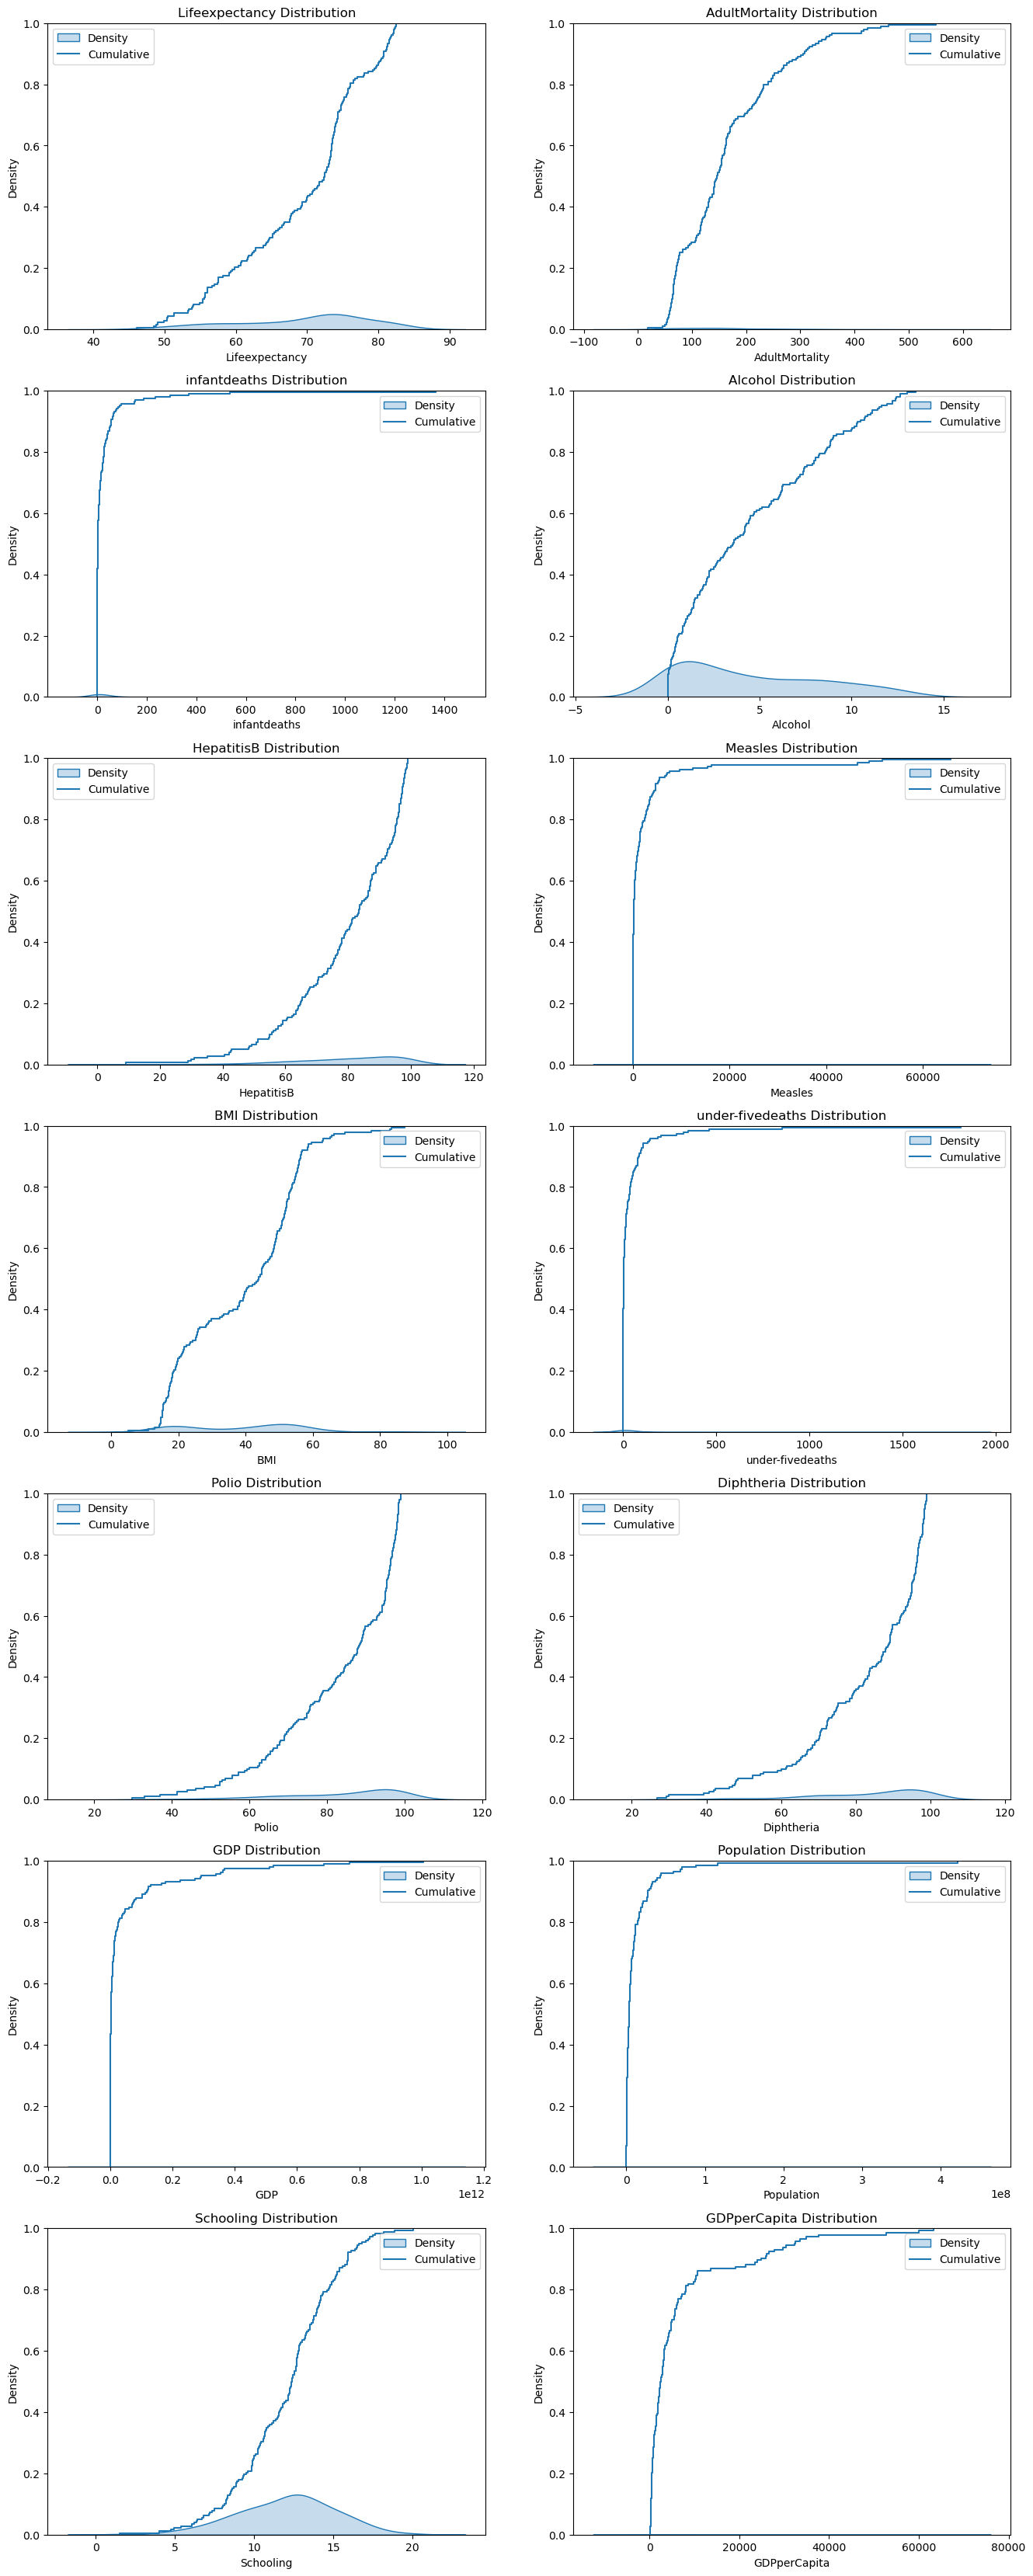

In [47]:
#Print all distribution

# Extract all numeric columns from the DataFrame for visualization, i'll exclude 'isDeveloped' col as it is binary
numeric_cols = dfLE.select_dtypes(include='number').columns.drop(['isDeveloped'], errors='ignore').tolist()
print(numeric_cols)  # printing the list just to verify which columns are selected



# Set up the plotting environment
n = len(numeric_cols)                  # Total number of numeric columns
rows = (n + 1) // 2                    # Calculating the number of subplot rows (2 plots per row)
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 6))  # Create subplots adjusting stuff and spacing
axes = axes.flatten()                 # Flattening the 2D axes array for easy indexing



#This is a Loop that goes through each numeric column and plot its distribution
i = 0 # Initialize subplot index; axes[i] starts at axes[0]
for col in numeric_cols:
    # Ploting the Kernel Density Estimate (smoothed histogram)
    sns.kdeplot(dfLE[col].dropna(), ax=axes[i], label='Density', fill=True)
    
    # Plotting Empirical Cumulative Distribution Function
    sns.ecdfplot(dfLE[col].dropna(), ax=axes[i], label='Cumulative')
    
    # Set plot title and legend
    axes[i].set_title(f"{col} Distribution")
    axes[i].legend()
    
    i += 1  # Move to the next subplot

### Create an analytical distribution for SCHOOLING, and use it for a couple of things. (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing the distribution. Do it <b>without</b> using a fit() method. Plot the emperical data on the same graph as the analytical distribution. 
<li>5 points are for using the distribution to predict the percentage of that have a schooling level within 1 year of Canada. 
</ul>

P-value: 0.1241


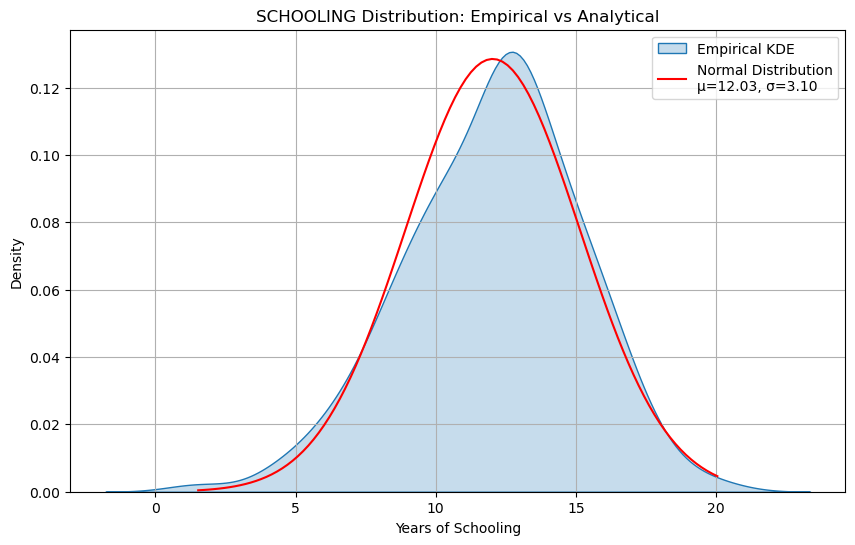

In [48]:
#Analytical for Schooling
from scipy.stats import norm, normaltest


# Extract SCHOOLING column and drop missing values
schooling_data = dfLE['Schooling'].dropna()

#CHECKING FOR NORMAL (ANALYTICAL DISTRIBUYION USING NORMALITY(hypothenis) TESTING,P-Value:
p_value = normaltest(schooling_data).pvalue
print(f"P-value: {p_value:.4f}") 
## p-value=0.1241>0.05, Since the p-value from the normality test is ~0.12, which is greater than 0.05,
## we fail to reject the null hypothesis that the SCHOOLING data is normally distributed.
## This means there is no statistically significant evidence against normality, 
## and it is reasonable to assume that the SCHOOLING variable follows an approximately normal distribution.


# i'll get the mean and std manually
mu = schooling_data.mean()
sigma = schooling_data.std()

# Create x-axis range for analytical curve
x_vals = np.linspace(schooling_data.min(), schooling_data.max(), 100)

# Computing normal distribution values(y-values)
normal_curve = norm.pdf(x_vals, loc=mu, scale=sigma)

# Plotting empirical KDE
plt.figure(figsize=(10, 6))
sns.kdeplot(schooling_data, label='Empirical KDE', fill=True)

# Plotting analytical normal distribution
plt.plot(x_vals, normal_curve, label=f'Normal Distribution\nμ={mu:.2f}, σ={sigma:.2f}', color='red')

# Final touches and design
plt.title("SCHOOLING Distribution: Empirical vs Analytical")
plt.xlabel("Years of Schooling")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

In [49]:
#part2-continued

# Filter Canada’s row and extract schooling value
canada_schooling = dfLE[dfLE['Country'] == 'Canada']['Schooling'].values[0]
print(f"Canada's average schooling: {canada_schooling:.2f} years")

# Canada's average schooling level 
canada_schooling = 15.88

# Define Bounds (within 1 year)
lower_bound = canada_schooling - 1
upper_bound = canada_schooling + 1

# Fit normal distribution to SCHOOLING data
schooling_data = dfLE['Schooling'].dropna()
mu = schooling_data.mean()
sigma = schooling_data.std()

# Calculate cumulative probabilities
p_lower = norm.cdf(lower_bound, loc=mu, scale=sigma)
p_upper = norm.cdf(upper_bound, loc=mu, scale=sigma)

# Compute percentage and print
percent_within_range = (p_upper - p_lower) * 100
print(f"The predicted percentage: {percent_within_range:.2f}%")

Canada's average schooling: 15.88 years
The predicted percentage: 12.01%


### Part 3: Create another analytical distribution for GDP per Capita (20pts)

<ul>
<li>5 points are for choosing an appropriate distribution. Please state it clearly somewhere.
<li>10 points are for creating and visualizing it alongside the emperical. You have free reign on how. 
<li>5 points are for using the analytical distribution to evaluate the quality of your GDP per capita metric - does it appear accurate? Why or why not?
<li>If you've judged GDP per cap to be unreliable, drop it. 
</ul>

<Axes: xlabel='GDPperCapita', ylabel='Density'>

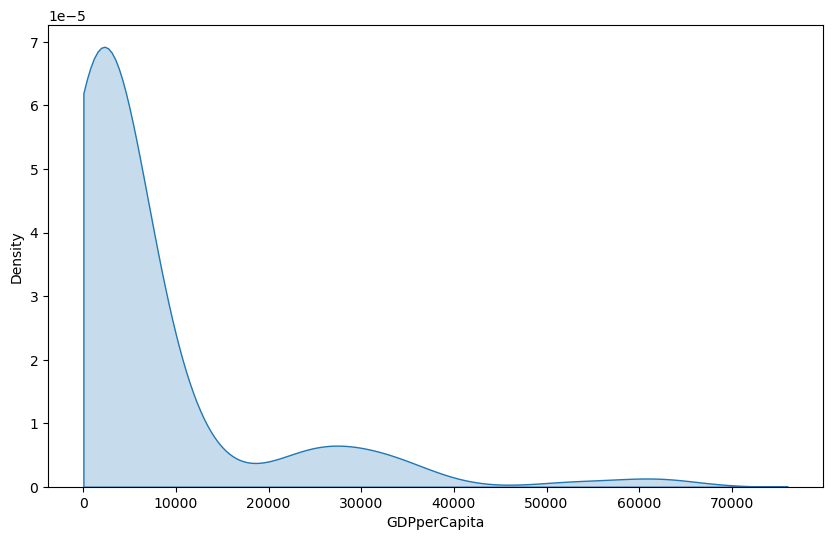

In [54]:
## Visualizing the Kde of GDP in a good scale for choosing an analytical distripution, 
# analytical distribution next cell
Gdp_capita=dfLE['GDPperCapita'].dropna()
plt.figure(figsize=(10, 6))

sns.kdeplot(Gdp_capita, label='Empirical KDE', fill=True, clip=(0, None))



P-value: 0.0000


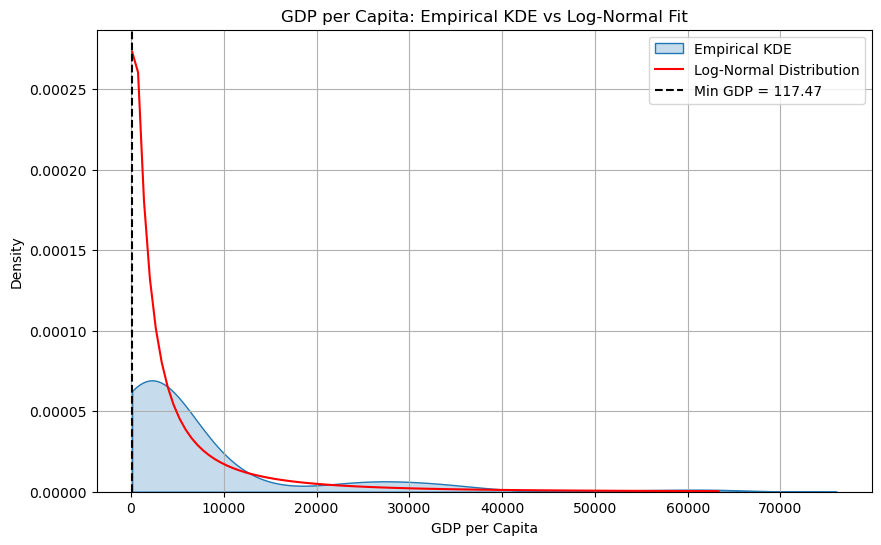

In [55]:
#Analytical for GDP/capita
from scipy.stats import lognorm, normaltest

# Extract GDP per capita and drop missing values
Gdp_capita = dfLE['GDPperCapita'].dropna()

#Normality test
p = normaltest(Gdp_capita).pvalue
print(f"P-value: {p:.4f}")

#p-value is way low the min value(0.05), we reject the normality hypothesis, data is not normall, also we can see than visually in the above graph


#Try lognormal, it would be the best fit for some reasons:
#1. GDP is strictly positive ,closely related to the income
#2. GDP is right-skewed
#3. Log(GDP) is often normally distributed (mostly not perfectly)
#
## Log-transform GDP to fit log-normal
log_Gdp = np.log(Gdp_capita)
mu = log_Gdp.mean()
sigma = log_Gdp.std()

# Create x-axis for plotting
x_vals = np.linspace(Gdp_capita.min(), Gdp_capita.max(), 100)

#Compute log-normal PDF
lognorm_curve = lognorm.pdf(x_vals, s=sigma, scale=np.exp(mu))

#Plot KDE and log-normal overlay
plt.figure(figsize=(10, 6))
sns.kdeplot(Gdp_capita, label='Empirical KDE', fill=True, clip=(Gdp_capita.min(), None))
plt.plot(x_vals, lognorm_curve, label='Log-Normal Distribution', color='red')
plt.axvline(x=Gdp_capita.min(), color='black', linestyle='--', linewidth=1.5, label=f'Min GDP = {Gdp_capita.min():.2f}') #min Gdp
plt.title("GDP per Capita: Empirical KDE vs Log-Normal Fit")
plt.xlabel("GDP per Capita")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()



Evaluating the Analytical Distribution of GDP per Capita
I attempted to model GDP per capita using a log-normal distribution, which is a common choice because:
- GDP is strictly positive
- It is right-skewed
- The log of GDP is often approximately normal
However, in this case, the log-normal model does not appear to fit the data well, and that is represented  in the original KDE (empirical density) that shows multiple peaks.
Some reason is that  GDP per capita is influenced by diverse factors like resource wealth, inequality, and political stability — which can create multi-modal or irregular distributions that a single log-normal model can't capture.



### Part 4: Visually identify correlations. Separate developed and not developed countries is some way. (15pts)

<ul>
<li>5 points are for effectively and clearly showing the visualizations used to evaluate correlations.
<li>10 points are for, in the process of visualizing, remove outliers that confound correlations. List outlier "filters" you used and justify why - was the data an error, a real value that is just way out of line, or somethingn else? Remember, you're trying to find things that have correlations with each other. Looking at a correlation between home size and income may not benefit from Jeff Bezos being included. It may be helpful to look at the results and revise. 
</ul>

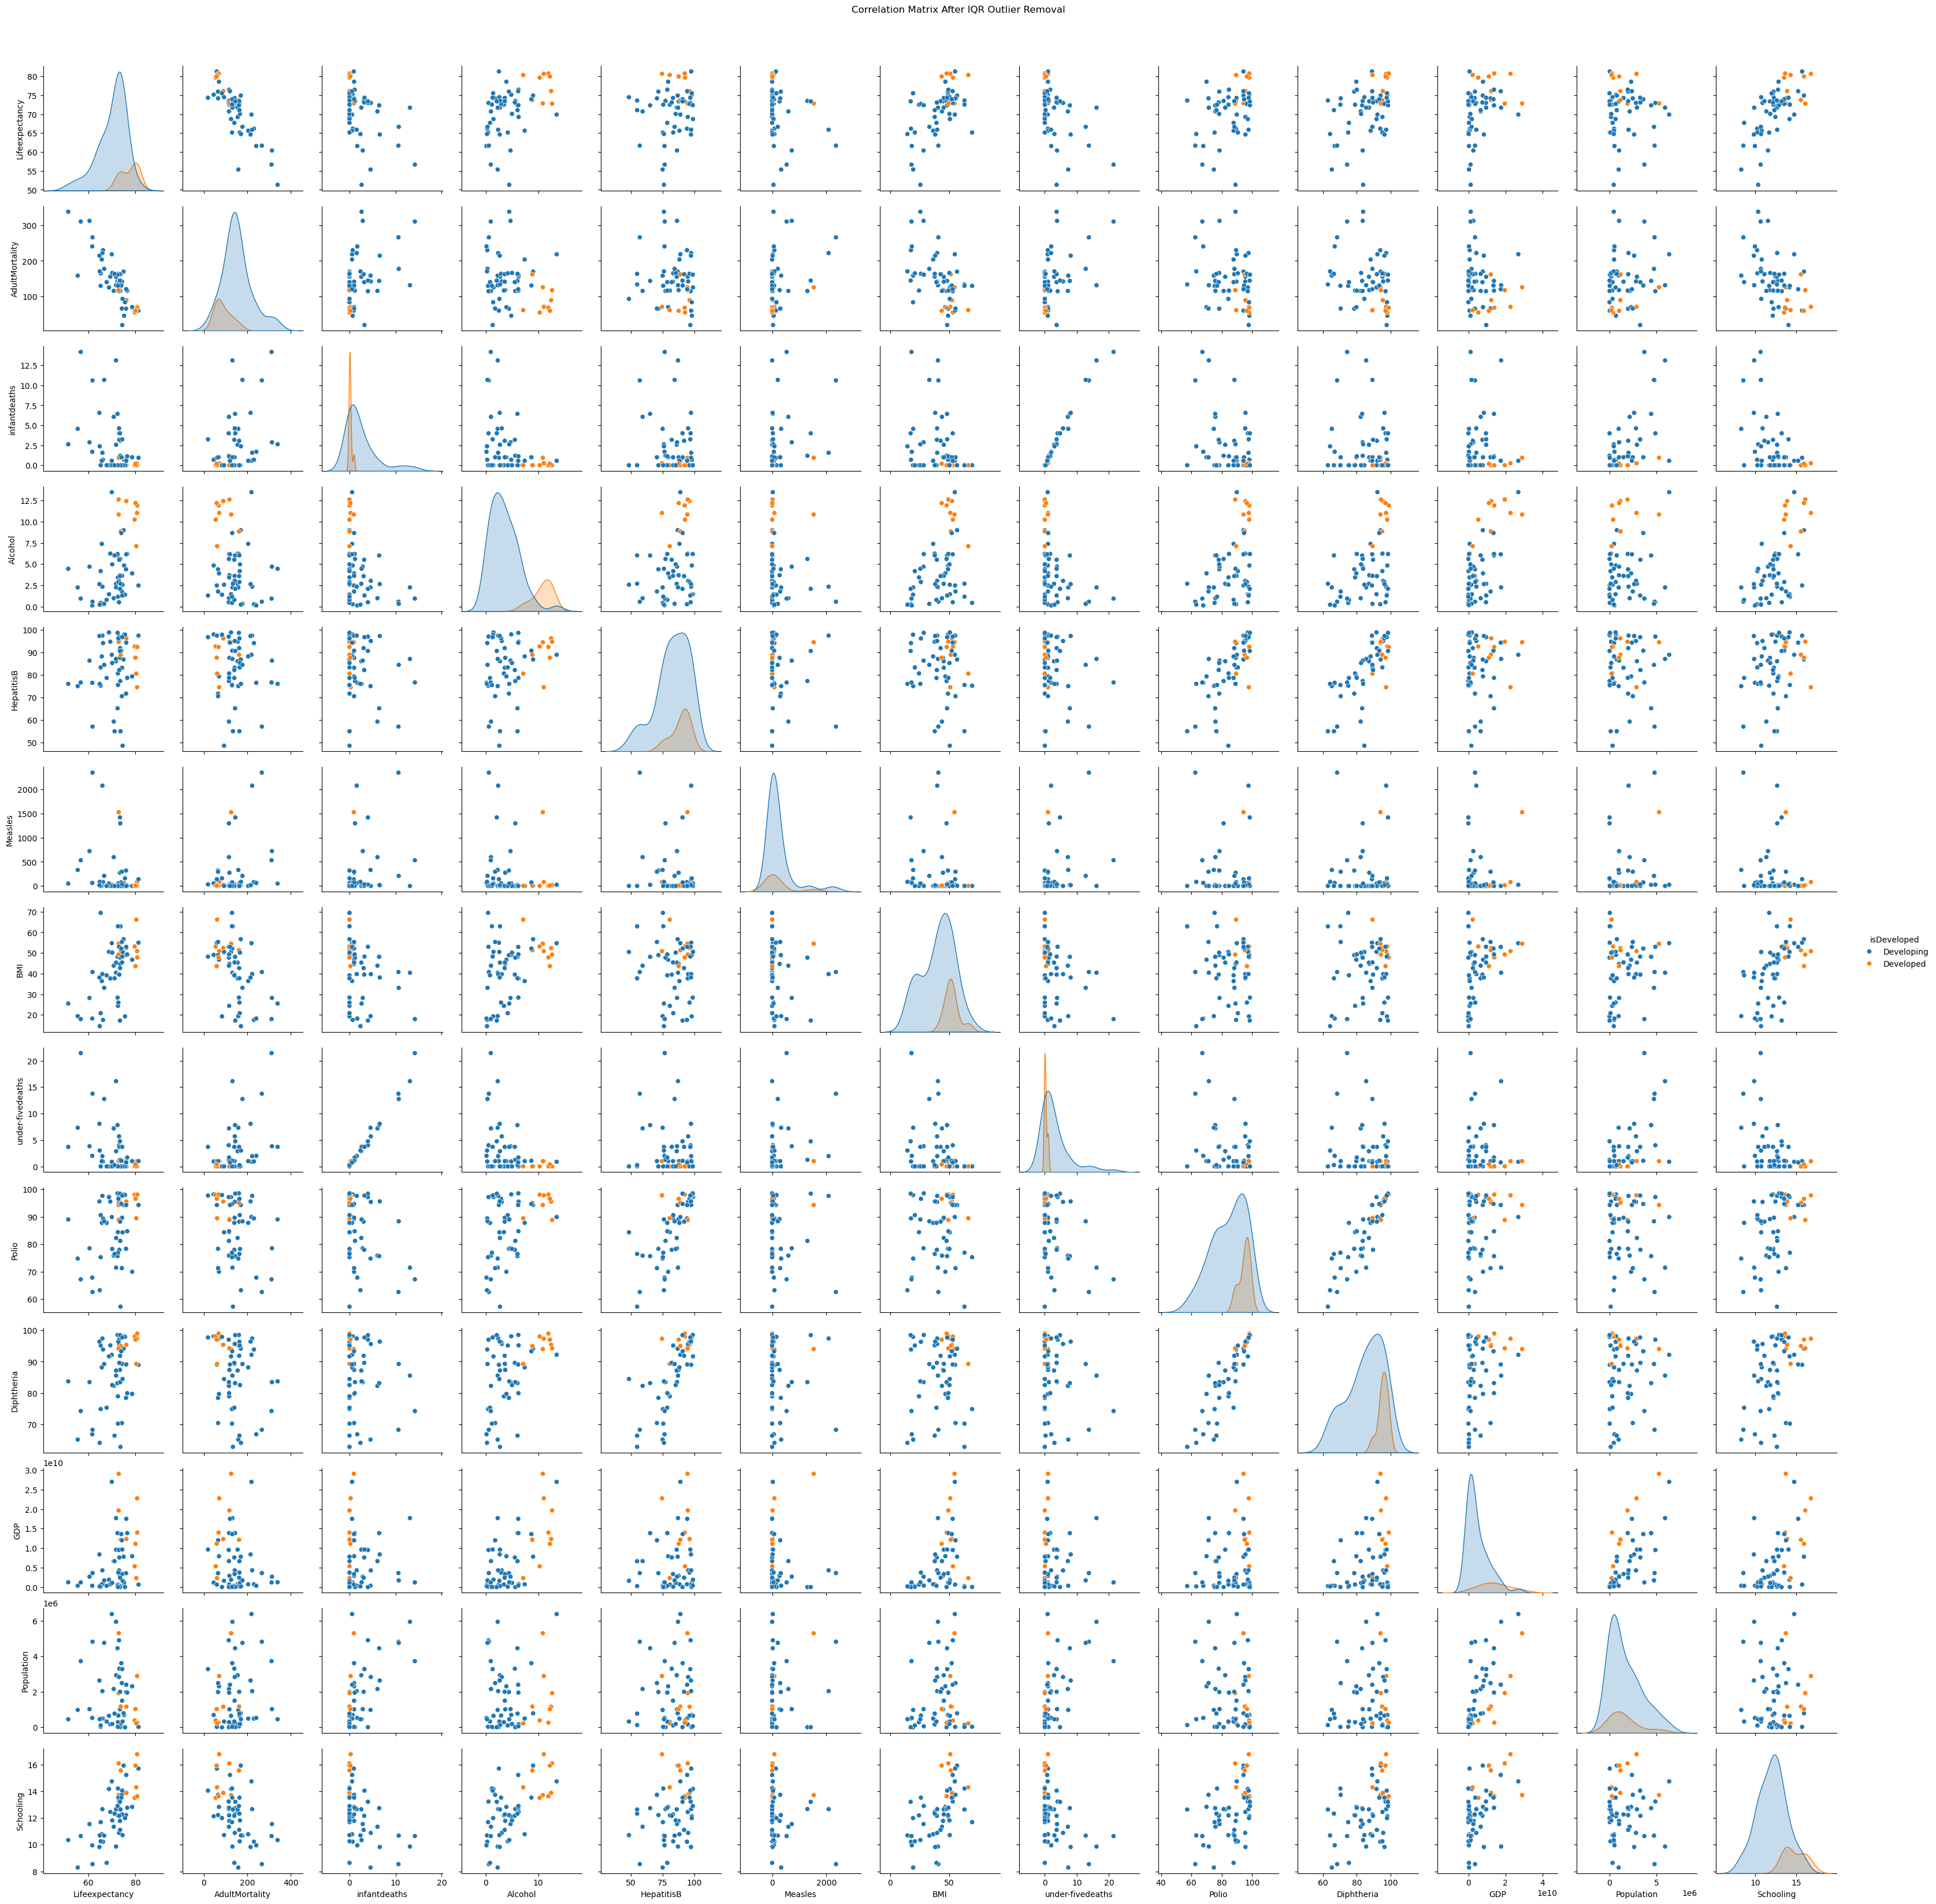

In [52]:
#Visualize correlations. 

#Drop 'Country' and copy the DataFrame
dfLE_simple = dfLE.drop(columns='Country').copy()
# Drop GDPperCapita from the dataset as permitted in the previous instructions
dfLE_simple = dfLE_simple.drop(columns=['GDPperCapita'])


# Convert isDeveloped to readable labels
dfLE_simple['isDeveloped'] = dfLE_simple['isDeveloped'].map({0: 'Developing', 1: 'Developed'})

# Apply IQR filtering to numeric columns
numeric_cols = dfLE_simple.select_dtypes(include=[np.number]).columns

def iqr_filter(df, columns):
    filtered_df = df.copy()
    for col in columns:
        Q1 = filtered_df[col].quantile(0.25)
        Q3 = filtered_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        filtered_df = filtered_df[(filtered_df[col] >= lower) & (filtered_df[col] <= upper)]
    return filtered_df

dfLE_filtered = iqr_filter(dfLE_simple, numeric_cols)

#Visualizing correlations with pairplot
sns.pairplot(dfLE_filtered, hue='isDeveloped')
plt.suptitle('Correlation Matrix After IQR Outlier Removal', y=1.02)
plt.show()

To visually identify correlations between health and economic indicators, I used a Seaborn pair plot to display scatterplots and histograms for all numeric variables in the dataset. I separated developed and developing countries using the isDeveloped column, which was mapped to readable labels for clarity. This allowed me to visually compare patterns across the two groups.
To remove outliers that could distort correlations, I applied the Interquartile Range (IQR) method. For each numeric column, I calculated the first quartile (Q1) and third quartile (Q3), then excluded any rows with values outside the range [Q1 - 1.5 \cdot IQR,\ Q3 + 1.5 \cdot IQR]. This method helps eliminate extreme values that fall far outside the central 50% of the data. These outliers may represent data entry errors, rare cases, or values that are valid but too extreme to be useful in identifying general trends.
After filtering, the pair plot revealed clearer relationships between variables such as life expectancy, and schooling, especially when comparing developed and developing countries. The removal of outliers improved the visibility of these correlations by reducing distortion from extreme values.


### Part 5: Calculate correlations (25pts)

<ul>
<li>5 points are for identifying and calculating 3 strongest correlations with life expectancy for each of developed and not developed. 
<li>10 points are for analyzing those correlations. Do they appear to be supported by reality? Do you have reason to beleive any are causal?
<li>10 points are for identifying 2 places where developing and developed countries have a substantially different relationship with respect to life expectancy, and theorizing why. What would be needed to confirm your thoughts?
</ul>

<b>Please put your written parts in markdown cells, with a little formatting to make them readable. 

In [53]:
#Calculate correlations and analyze


# Split the filtered dataset by development status
df_dev = dfLE_filtered[dfLE_filtered['isDeveloped'] == 'Developed'] #Developed equivalent to developed(1)
df_devp = dfLE_filtered[dfLE_filtered['isDeveloped'] == 'Developing'] #Developing equivalent to not developed(0)

# Calculate correlations with Lifeexpectancy
corr_dev = df_dev.corr(numeric_only=True)['Lifeexpectancy'].sort_values(ascending=False)
corr_devp = df_devp.corr(numeric_only=True)['Lifeexpectancy'].sort_values(ascending=False)

# Display top 3 correlations(strongest) for each group
print("Top 3 correlations with Lifeexpectancy (Developed):")
print(corr_dev.drop('Lifeexpectancy').head(3))

print("\nTop 3 correlations with Lifeexpectancy (Developing):")
print(corr_devp.drop('Lifeexpectancy').head(3))

Top 3 correlations with Lifeexpectancy (Developed):
Polio         0.451733
Diphtheria    0.288391
BMI           0.049188
Name: Lifeexpectancy, dtype: float64

Top 3 correlations with Lifeexpectancy (Developing):
Schooling     0.648003
BMI           0.522228
Diphtheria    0.306910
Name: Lifeexpectancy, dtype: float64


## Analyzing correlations

- Polio (0.45)
This strong positive correlation suggests that countries with higher polio immunization rates tend to have longer life expectancy. This is supported by reality: widespread vaccination reduces preventable deaths and reflects strong public health infrastructure. The relationship is likely causal, especially in earlier decades when polio posed a major threat.
- Diphtheria (0.29)
Similar to polio, diphtheria vaccination coverage correlates positively with life expectancy. This is plausible and partially causal, as it reflects both direct protection from disease and broader access to healthcare systems.
- BMI (0.05)
The weak correlation suggests BMI has little predictive power for life expectancy in developed countries. This makes sense — BMI varies widely and may reflect both underweight and overweight populations. The relationship is not clearly causal and likely confounded by diet, activity, and healthcare access.



- Schooling (0.65)
This is the strongest correlation observed. More years of schooling are strongly associated with longer life expectancy. This is supported by reality and likely causal: education improves health literacy, economic opportunity, and access to care.
- BMI (0.52)
In developing countries, higher BMI may reflect better nutrition and reduced poverty. This correlation is plausible, but not necessarily causal — it may be a proxy for food security or economic development.
- Diphtheria (0.31)
As in developed countries, diphtheria vaccination coverage correlates positively with life expectancy. This is partially causal, as it reflects both disease prevention and broader healthcare access.




## Differences in Life Expectancy Relationships


 1. Vaccination Coverage (Polio & Diphtheria)
- Developed Countries:
Vaccination rates (e.g., Polio: 0.45, Diphtheria: 0.29) show strong positive correlations with life expectancy. This reflects historical public health success — most developed countries have near-universal coverage, and vaccines helped eliminate deadly diseases.
- Developing Countries:
Diphtheria shows a weaker correlation (0.31), and Polio is not among the top predictors. This may be due to inconsistent access, logistical challenges, or data gaps in reporting.
Theory: In developed countries, vaccines are a baseline public health measure. In developing countries, coverage varies and may not yet be a strong predictor due to competing health risks.

To confirm: We’d need longitudinal data on immunization campaigns, disease incidence, and healthcare infrastructure — ideally stratified by region and income level.



 2. Education (Schooling)
- Developing Countries:
Schooling has a very strong correlation with life expectancy (0.65). This suggests that education is a key driver of health outcomes — improving literacy, economic opportunity, and access to care.
- Developed Countries:
Schooling does not appear among the top predictors. This may be because education levels are already high, and other factors (like lifestyle or chronic disease management) dominate.
Theory: In developing countries, education is transformative. In developed countries, its marginal impact is smaller because basic education is already universal.

To confirm: We’d need to compare life expectancy across education levels within each country, controlling for income, healthcare access, and urbanization.



